In [52]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install datetime
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2343 sha256=0990fb7eb6f7eaf3f7afb6733933e12168b68d2cd73cb4123e23165a0db85c3f
  Stored in directory: /Users/shuhailmalayil/Library/Caches/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn import linear_model

In [3]:
# Import data file and assign to variable
stock_data = pd.read_csv('all_stocks_5yr.csv', parse_dates=['date'])

In [4]:
# Show all column names within dataset
stock_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [5]:
# Start of data set
stock_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [6]:
# End of dataset
stock_data.tail()

,date,open,high,low,close,volume,Name
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.69,73.86,4534912,ZTS


In [7]:
# Describe the data by column
stock_data.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [18]:
# Sum NaN values per column within dataset
stock_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [9]:
# Clean data set and ignore any rows with NaN value
stock_data = stock_data.dropna(how='any')
print(f"Shape of dataset is {stock_data.shape}")

Shape of dataset is (619029, 7)


In [17]:
stock_data.dropna(inplace=True)


In [19]:
# Good to have an idea of the date range
print(f"First recorded date: {stock_data['date'].min()}")
print(f"Last recorded date: {stock_data['date'].max()}")

First recorded date: 2013-02-08 00:00:00
Last recorded date: 2018-02-07 00:00:00


# What season of the year is the best time to trade?

We will look at the data to see if there is a best time of year to trade, and if so, what time of year or season is this in. Since the data set is for American based firms listed on the New York stock exchange, we will look at the time of year and season from the northern hemisphere perspective:

* Spring from March 20th to June 20th
* Summer from June 21st to September 23rd
* Autumn from September 24th to December 22nd
* And Winter from December 23rd to March 19th.

References to dates can be found [here](http://science.howstuffworks.com/dictionary/astronomy-terms/seasons-info.htm)

This question can be answered by looking at a few factors that we can assess by the dataset. For instance; volatility. If there are a large amount of shares being bought on one stock on a certain day, then the stock exchange will represent growth and vice versa if there are a lot of sells acorss all stocks. Let's take a look at the average traded volume per year, month, week and day.

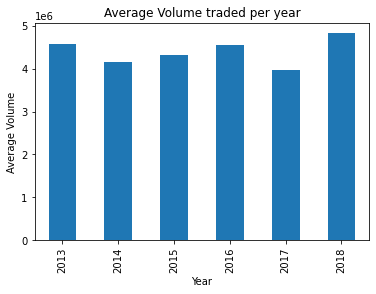

In [20]:
year_data = stock_data.set_index('date').groupby(pd.Grouper(freq='Y'))
year_data = year_data['volume'].mean().plot(kind='bar')
year_data.set_xticklabels(('2013', '2014', '2015', '2016', '2017', '2018'))
year_data.set_ylabel('Average Volume')
year_data.set_xlabel('Year')
year_data.set_title('Average Volume traded per year')
plt.show()

In [53]:
#Retreiving the mean volume group by the month
avg_permonth = stock_data.set_index('date').groupby(pd.Grouper(freq='M'))
avg_permonth = avg_permonth['volume'].mean()

# Plot to show mean of volume per month of year


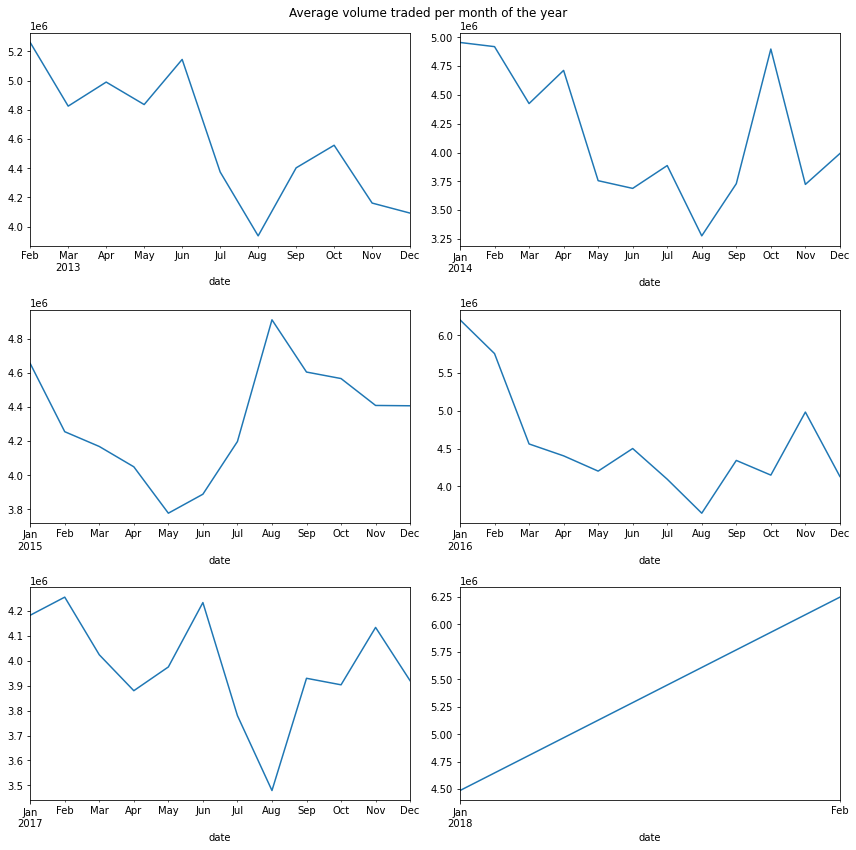

In [62]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
for i, (year, sg) in enumerate(avg_permonth.groupby(avg_permonth.index.year)):
    sg.plot(ax=axs[i//2, i%2])
    
fig.suptitle('Average volume traded per month of the year', fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

Apart from 2015, August seems to be the time where the volume seems to be at its lowest amount. This is in mid summer, not the beggining or right at the end of it.

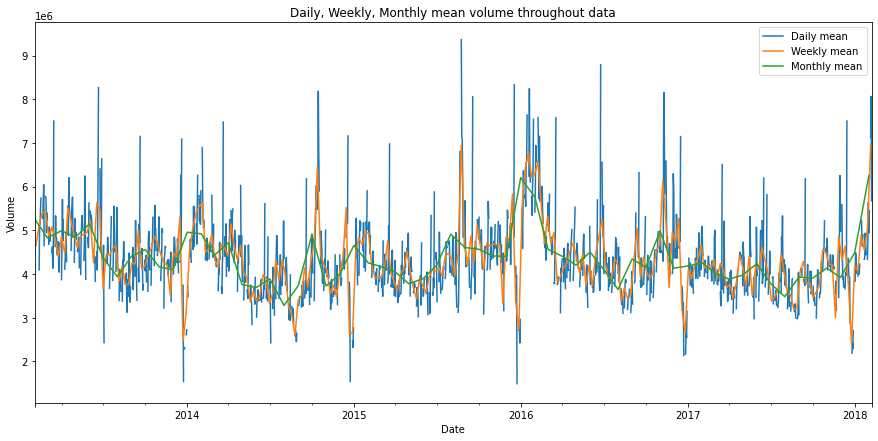

In [22]:
# Average volume per day
avg_perday = stock_data.set_index('date').groupby(pd.Grouper(freq='d'))
avg_perday['volume'].mean().plot(figsize=(15, 7))

# Average volume per week
avg_perweek = stock_data.set_index('date').groupby(pd.Grouper(freq='w'))
avg_perweek['volume'].mean().plot(figsize=(15, 7))

# Average volume per month
avg_permonth = stock_data.set_index('date').groupby(pd.Grouper(freq='m'))
avg_permonth['volume'].mean().plot(figsize=(15, 7))

plt.legend(('Daily mean', 'Weekly mean', 'Monthly mean'))
plt.title('Daily, Weekly, Monthly mean volume throughout data')
plt.xlabel('Date')
plt.ylabel('Volume')

plt.show()

At the end of each year there are huge drops in volume for the NYSE's listed companies and right after the turn of each new year, there are high spikes in the volume.

## General Motor Company vs. Ford Motors

By comparing General Motors and Ford Motors we're looking at the two biggest tech stocks on the market (most popular anyway, not by market share) Analysing these two stocks and comparing against each other by opening and closing prices, high and low price, we can judge what would've been a great day to buy these two particular shares.

In [23]:
# GMC 5 year history
GMC = stock_data.loc[stock_data.Name=='GM', :]
GMC

,date,open,high,low,close,volume,Name
249049,2013-02-08,28.54,28.73,28.50,28.57,6316645,GM
249050,2013-02-11,28.51,28.65,28.35,28.53,5589830,GM
249051,2013-02-12,28.43,28.75,28.24,28.55,7175443,GM
249052,2013-02-13,28.75,28.87,28.44,28.67,9281737,GM
249053,2013-02-14,28.74,29.36,27.67,27.75,19226730,GM
...,...,...,...,...,...,...,...
250303,2018-02-01,42.12,42.60,41.95,42.43,9629833,GM
250304,2018-02-02,42.22,42.27,40.85,41.00,13982144,GM
250305,2018-02-05,40.98,41.67,39.51,39.54,19660620,GM
250306,2018-02-06,40.06,42.23,40.00,41.86,26988259,GM


In [24]:
# Ford 5 year history
Ford = stock_data.loc[stock_data.Name=='F', :]
Ford

,date,open,high,low,close,volume,Name
240236,2013-02-08,13.10,13.16,13.05,13.10,18596061,F
240237,2013-02-11,13.06,13.20,13.02,13.11,17685616,F
240238,2013-02-12,13.12,13.20,13.05,13.08,26231279,F
240239,2013-02-13,13.11,13.14,12.99,13.04,24501066,F
240240,2013-02-14,13.00,13.17,12.96,13.11,33487476,F
...,...,...,...,...,...,...,...
241490,2018-02-01,10.95,11.00,10.85,10.92,41352192,F
241491,2018-02-02,10.88,10.88,10.62,10.71,72312922,F
241492,2018-02-05,10.78,10.80,10.24,10.24,96756955,F
241493,2018-02-06,10.27,10.79,10.19,10.76,139938127,F


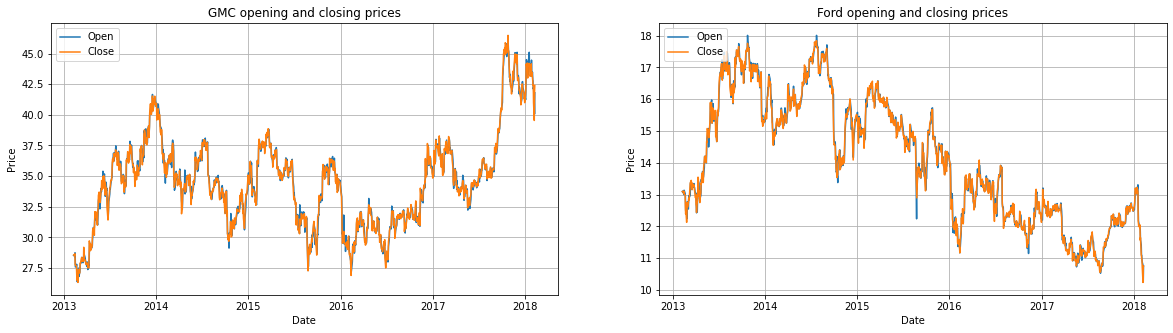

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# GMC graph
plt.subplot(121)
plt.plot(GMC['date'], GMC['open'])
plt.plot(GMC['date'], GMC['close'])
plt.title('GMC opening and closing prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(('Open', 'Close'), loc='upper left')
plt.grid(True)

# Ford graph
plt.subplot(122)
plt.plot(Ford['date'], Ford['open'])
plt.plot(Ford['date'], Ford['close'])
plt.title('Ford opening and closing prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend(('Open', 'Close'), loc='upper left')


plt.show()

We can see that there is not much difference between the opening and closing prices for these two shares.The best points on the graph would be the lowest opening price and highest closing price.

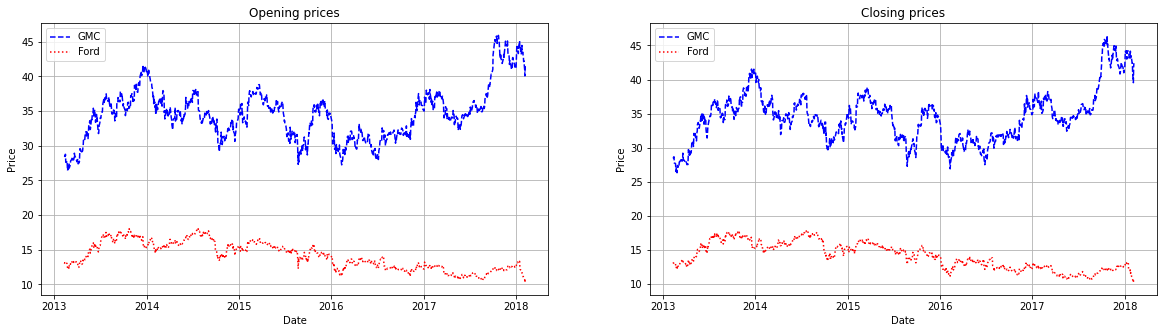

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Opening prices
plt.subplot(121)
plt.plot(GMC['date'], GMC['open'], '--b')
plt.plot(Ford['date'], Ford['open'], ':r')
plt.title('Opening prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(('GMC', 'Ford'), loc='upper left')
plt.grid(True)

# Closing prices
plt.subplot(122)
plt.plot(GMC['date'], GMC['close'], '--b')
plt.plot(Ford['date'], Ford['close'], ':r')
plt.title('Closing prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend(('GMC', 'Ford'), loc='upper left')


plt.show()

GMC has a larger share price which would bring back a larger profit if it was invested by bulk at specific times. However there is the risk of losing much more too.

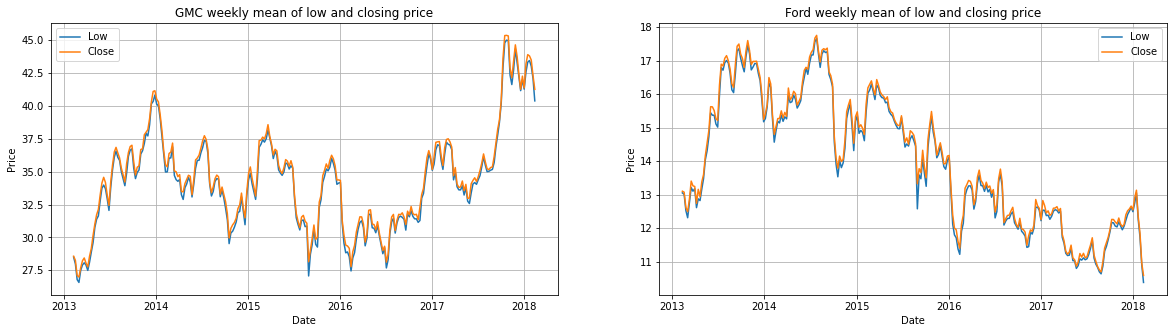

In [27]:
df1 = GMC.set_index('date').loc[:, ['low']]
df2 = GMC.set_index('date').loc[:, ['close']]
df3 = Ford.set_index('date').loc[:, ['low']]
df4 = Ford.set_index('date').loc[:, ['close']]

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

plt.subplot(121)
plt.plot(df1.groupby(pd.Grouper(freq='w')).mean())
plt.plot(df2.groupby(pd.Grouper(freq='w')).mean())
plt.grid(True)
plt.legend(('Low', 'Close'))
plt.title('GMC weekly mean of low and closing price')
plt.xlabel('Date')
plt.ylabel('Price')

plt.subplot(122)
plt.plot(df3.groupby(pd.Grouper(freq='w')).mean())
plt.plot(df4.groupby(pd.Grouper(freq='w')).mean())
plt.grid(True)
plt.legend(('Low', 'Close'))
plt.title('Ford weekly mean of low and closing price')
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()

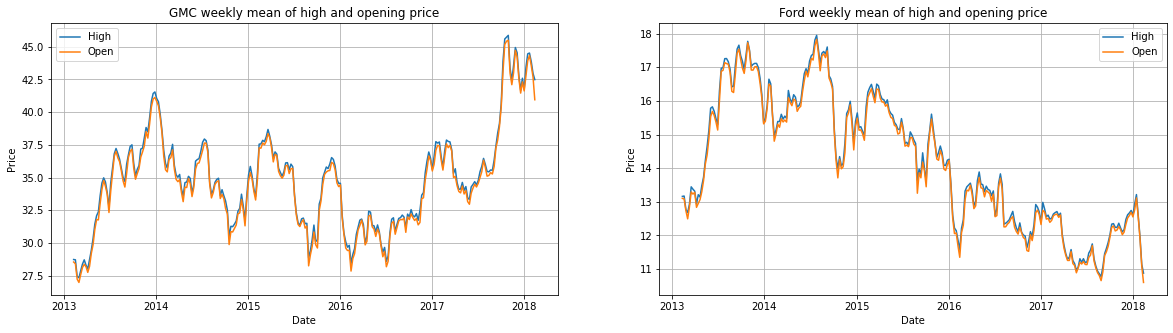

In [28]:
df1 = GMC.set_index('date').loc[:, ['high']]
df2 = GMC.set_index('date').loc[:, ['open']]
df3 = Ford.set_index('date').loc[:, ['high']]
df4 = Ford.set_index('date').loc[:, ['open']]

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

plt.subplot(121)
plt.plot(df1.groupby(pd.Grouper(freq='w')).mean())
plt.plot(df2.groupby(pd.Grouper(freq='w')).mean())
plt.grid(True)
plt.legend(('High', 'Open'))
plt.title('GMC weekly mean of high and opening price')
plt.xlabel('Date')
plt.ylabel('Price')

plt.subplot(122)
plt.plot(df3.groupby(pd.Grouper(freq='w')).mean())
plt.plot(df4.groupby(pd.Grouper(freq='w')).mean())
plt.grid(True)
plt.legend(('High', 'Open'))
plt.title('Ford weekly mean of high and opening price')
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()

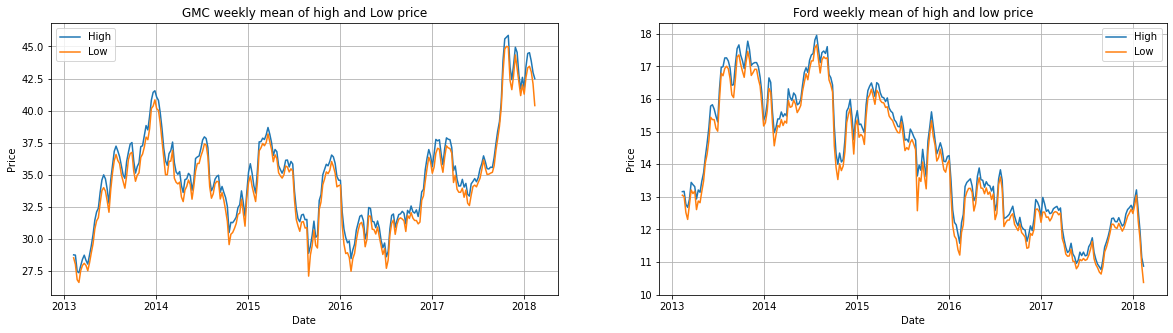

In [29]:
df1 = GMC.set_index('date').loc[:, ['high']]
df2 = GMC.set_index('date').loc[:, ['low']]
df3 = Ford.set_index('date').loc[:, ['high']]
df4 = Ford.set_index('date').loc[:, ['low']]

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

plt.subplot(121)
plt.plot(df1.groupby(pd.Grouper(freq='w')).mean())
plt.plot(df2.groupby(pd.Grouper(freq='w')).mean())
plt.grid(True)
plt.legend(('High', 'Low'))
plt.title('GMC weekly mean of high and Low price')
plt.xlabel('Date')
plt.ylabel('Price')

plt.subplot(122)
plt.plot(df3.groupby(pd.Grouper(freq='w')).mean())
plt.plot(df4.groupby(pd.Grouper(freq='w')).mean())
plt.grid(True)
plt.legend(('High', 'Low'))
plt.title('Ford weekly mean of high and low price')
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


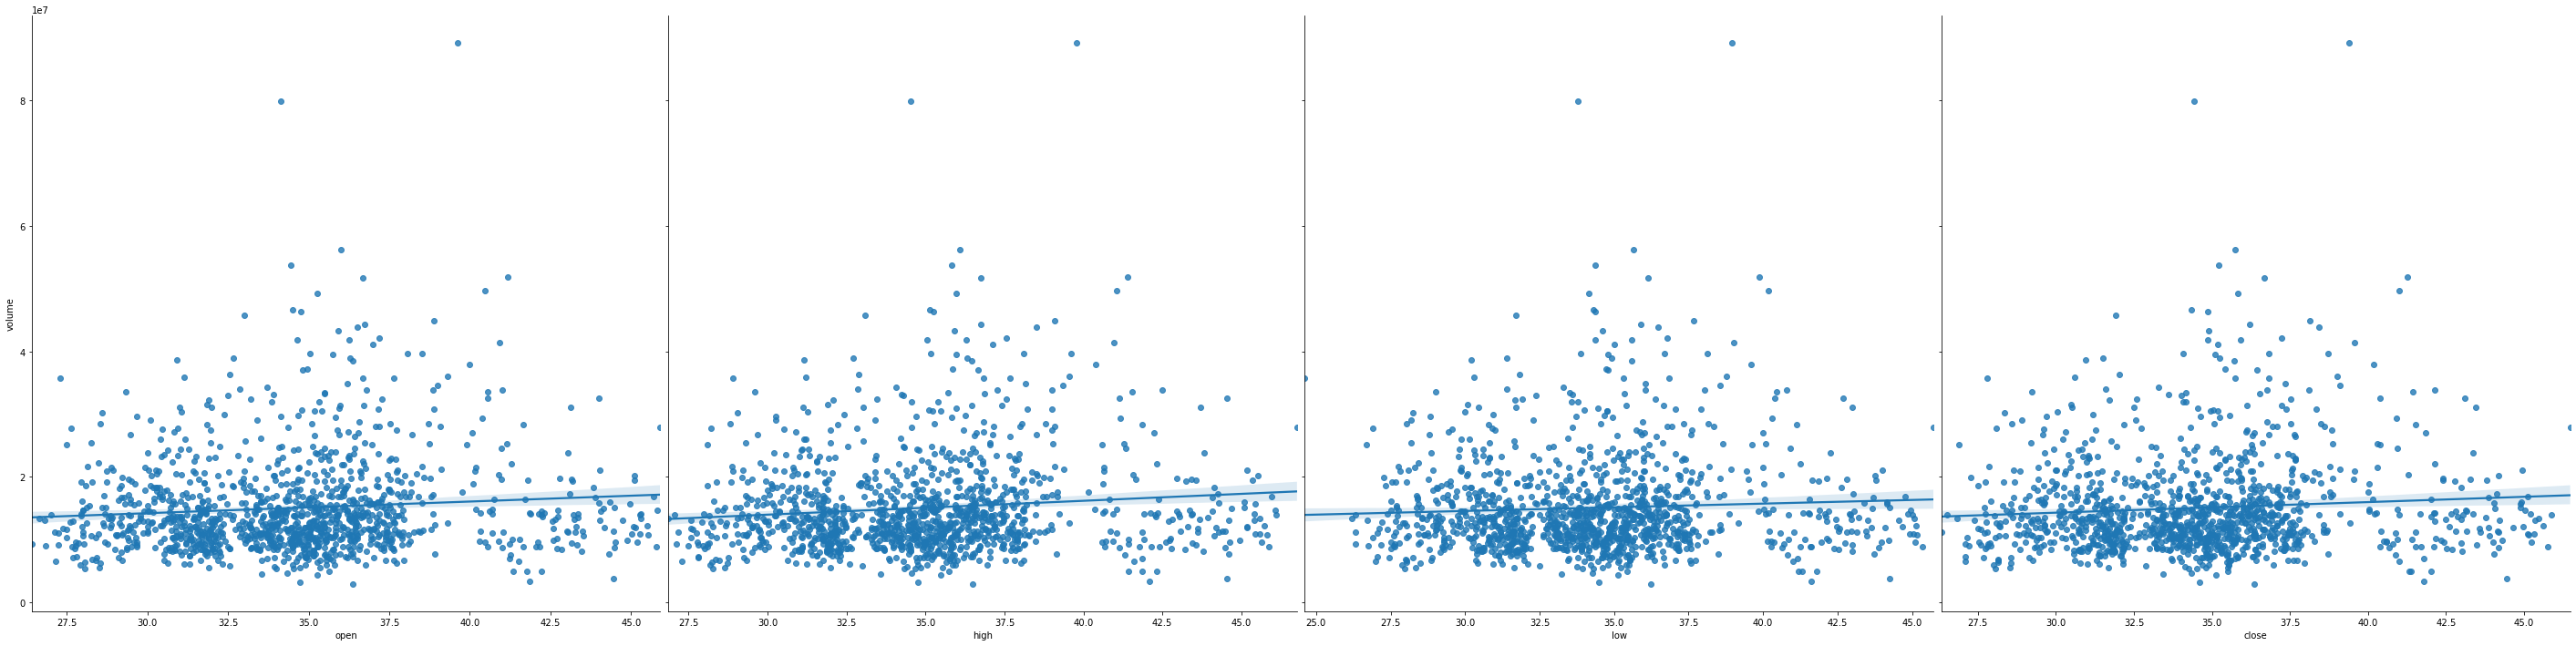

In [30]:
sns.pairplot(GMC, x_vars=['open', 'high', 'low', 'close'], y_vars=['volume'], size=10, kind='reg')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


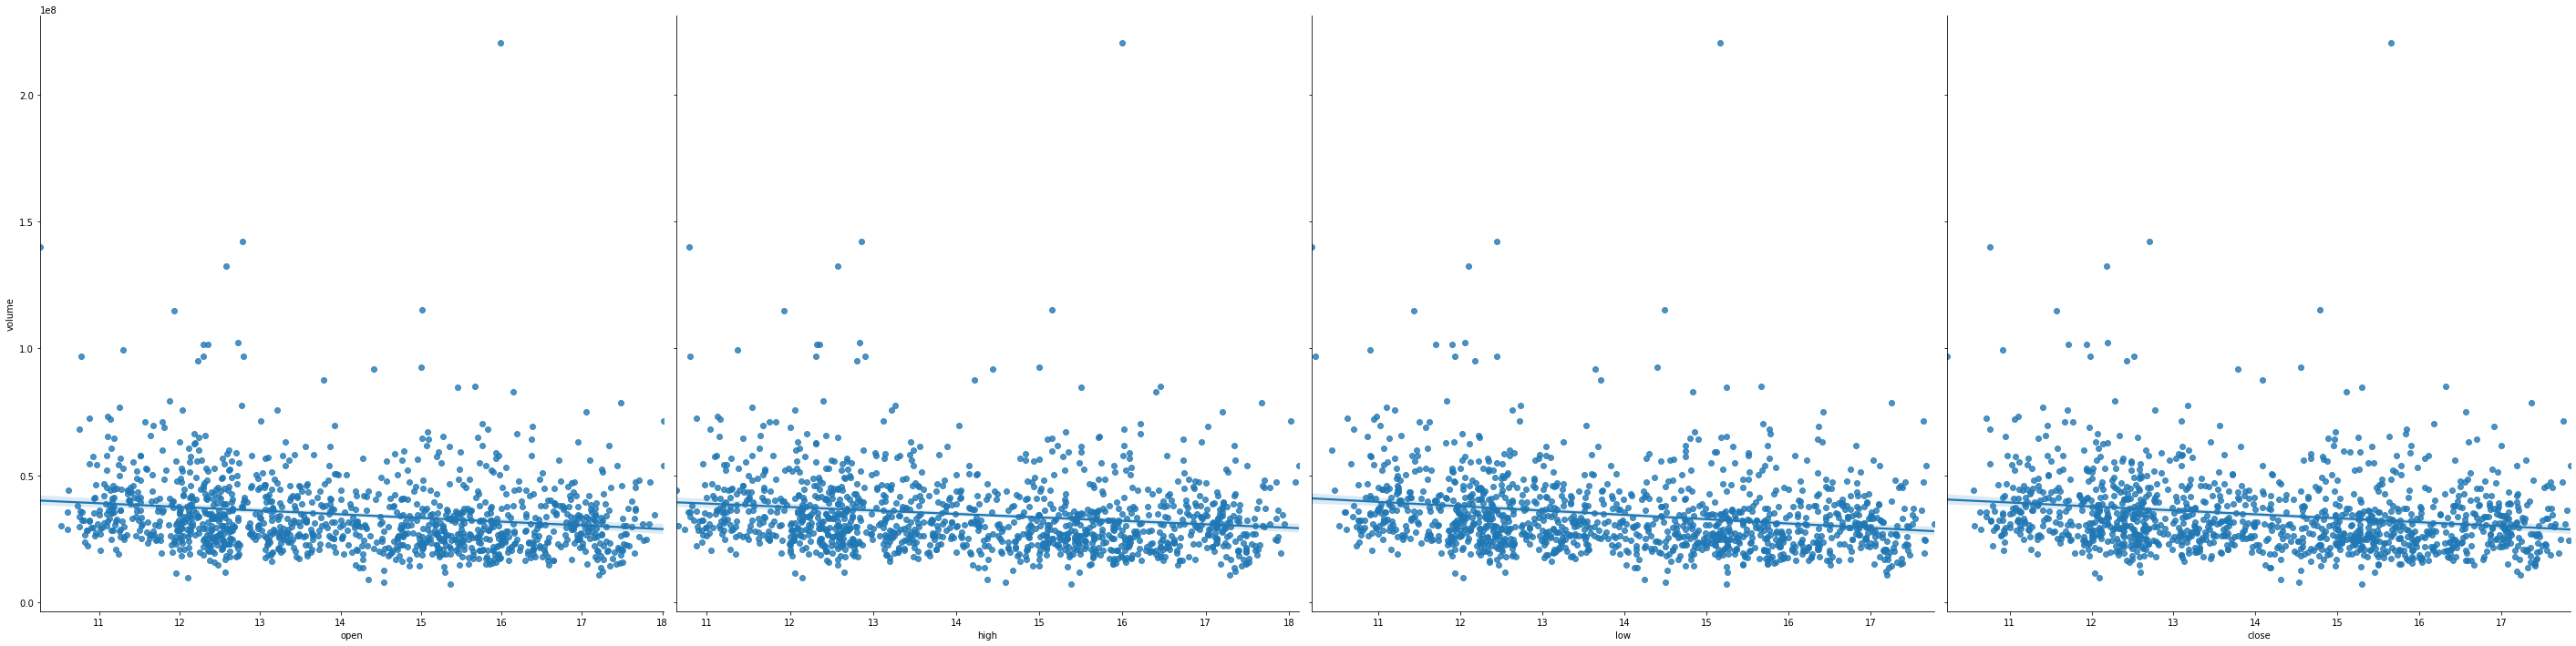

In [66]:
sns.pairplot(Ford, x_vars=['open', 'high', 'low', 'close'], y_vars=['volume'], size=10, kind='reg')

### Scatter plots of General Motors in 2015 and 2016

In [32]:
GMC_2015 = GMC.set_index('date')
GMC_2015 = GMC_2015.loc['2015-01':'2015-12']

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


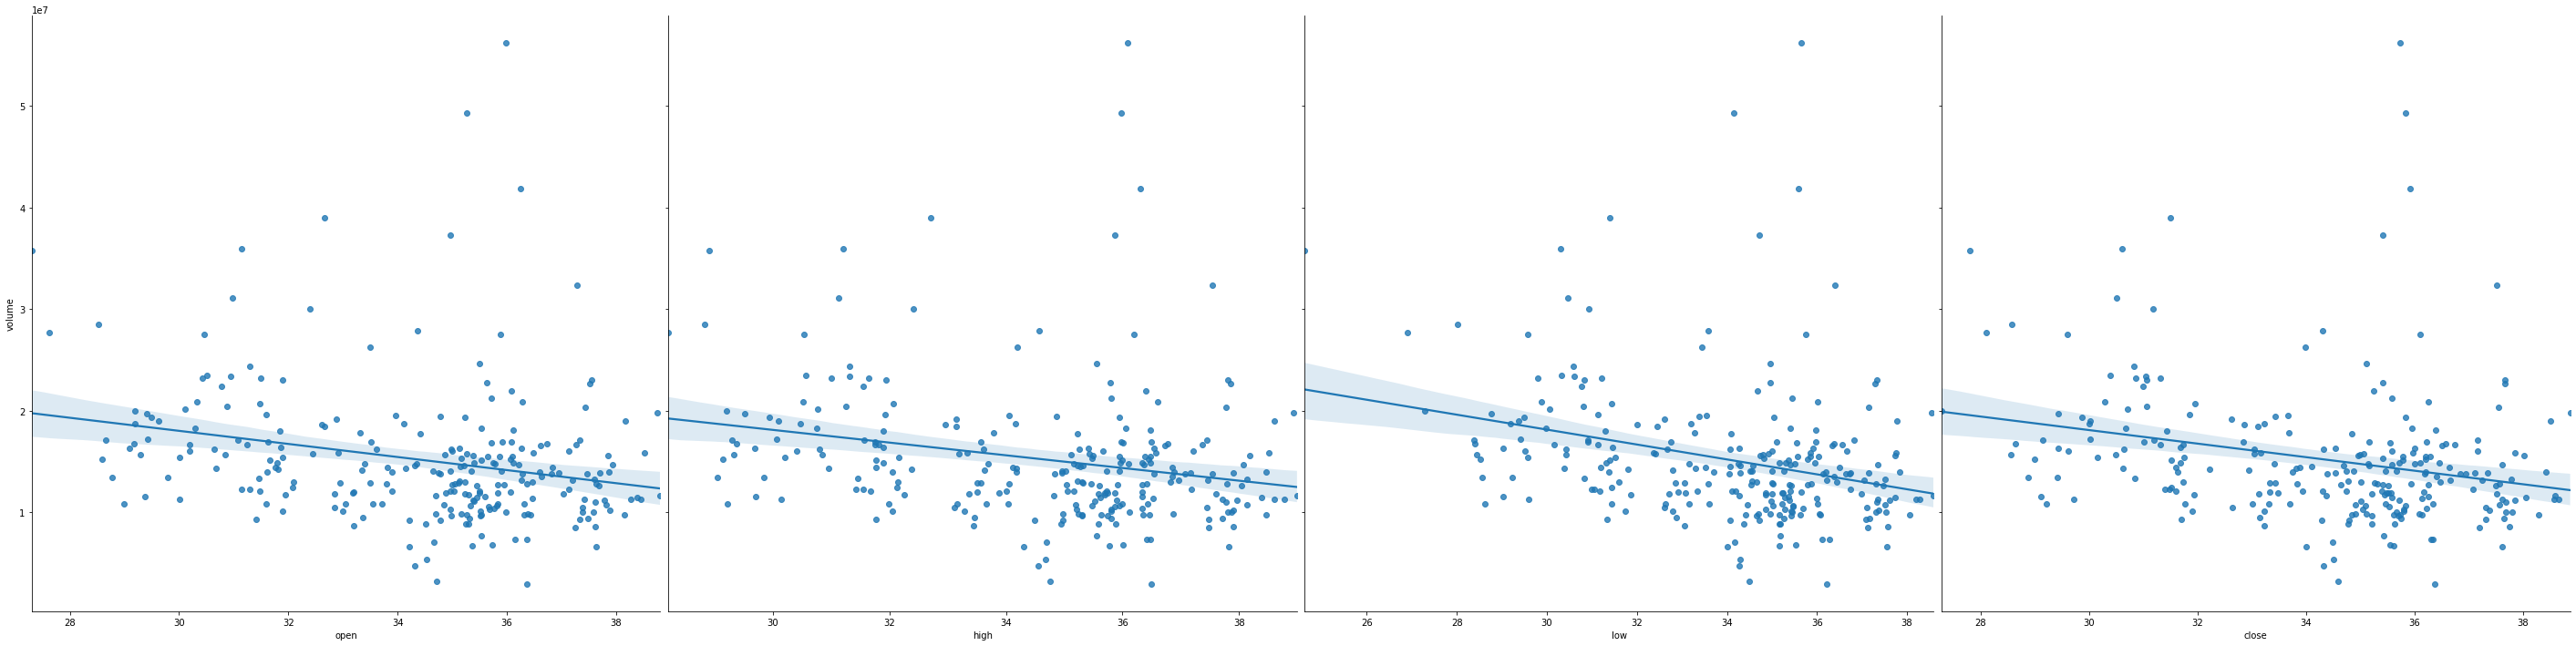

In [88]:
sns.pairplot(GMC_2015, x_vars=['open', 'high', 'low', 'close'], y_vars=['volume'], size=10, kind='reg')

There are a lot of points around the 36 mark for open, high, close, low and close. We'll check the date of when apple was at this price.

In [89]:
input = 36
print(GMC.iloc[(GMC['open']-input).abs().argsort()[:2]])
print(GMC.iloc[(GMC['high']-input).abs().argsort()[:2]])
print(GMC.iloc[(GMC['low']-input).abs().argsort()[:2]])
print(GMC.iloc[(GMC['close']-input).abs().argsort()[:2]])

             date   open    high     low  close    volume Name
249386 2014-06-12  36.00  36.278  35.490  35.52  16818453   GM
250170 2017-07-24  35.99  36.090  35.723  35.82  11699821   GM
             date   open  high    low  close    volume Name
249212 2013-10-02  35.74  36.0  35.23  35.94  19459686   GM
250156 2017-07-03  34.52  36.0  34.45  35.57  10915736   GM
             date   open    high   low  close    volume Name
249307 2014-02-19  36.22  36.715  36.0  36.03  23070864   GM
249308 2014-02-20  36.19  36.600  36.0  36.51  18651132   GM
             date   open   high    low  close    volume Name
249551 2015-02-06  36.26  36.54  35.92   36.0  16320448   GM
249552 2015-02-09  35.79  36.10  35.51   36.0  14797519   GM


In [90]:
GMC_2016 = GMC.set_index('date')
GMC_2016 = GMC_2016.loc['2016-01':'2016-12']

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


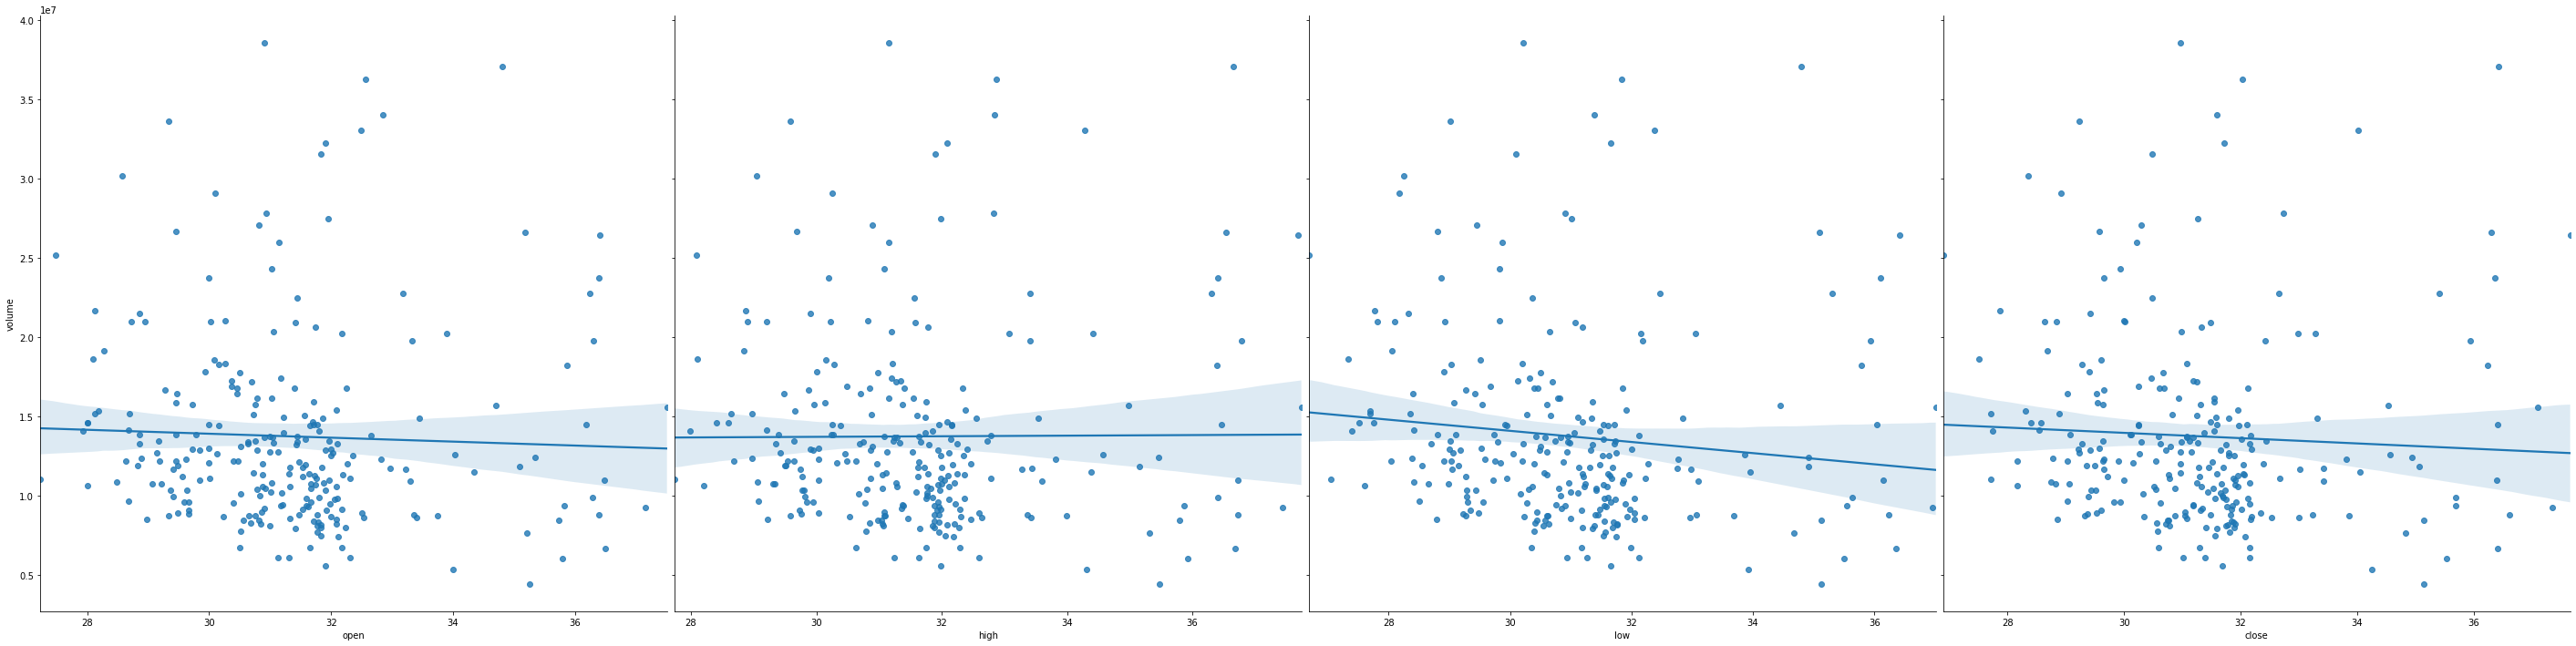

In [91]:
sns.pairplot(GMC_2016, x_vars=['open', 'high', 'low', 'close'], y_vars=['volume'], size=10, kind='reg')

In [92]:
input = 32
print(GMC.iloc[(GMC['open']-input).abs().argsort()[:2]])
print(GMC.iloc[(GMC['high']-input).abs().argsort()[:2]])
print(GMC.iloc[(GMC['low']-input).abs().argsort()[:2]])
print(GMC.iloc[(GMC['close']-input).abs().argsort()[:2]])

             date  open   high   low  close    volume Name
249853 2016-04-20  32.0  32.41  32.0  32.19  12911513   GM
249496 2014-11-17  32.0  32.49  31.9  32.31  11900544   GM
             date   open  high    low  close    volume Name
249945 2016-08-30  31.67  32.0  31.23  31.67  10748741   GM
249951 2016-09-08  31.85  32.0  31.68  31.71  11808229   GM
             date   open   high   low  close    volume Name
249853 2016-04-20  32.00  32.41  32.0  32.19  12911513   GM
249116 2013-05-16  32.09  32.67  32.0  32.39  10425265   GM
             date   open    high    low  close    volume Name
249993 2016-11-07  31.58  32.145  31.54  32.02  13560207   GM
249921 2016-07-27  32.18  32.290  31.97  32.02   9159541   GM


### Scatter plots of Ford in 2015 and 2016

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


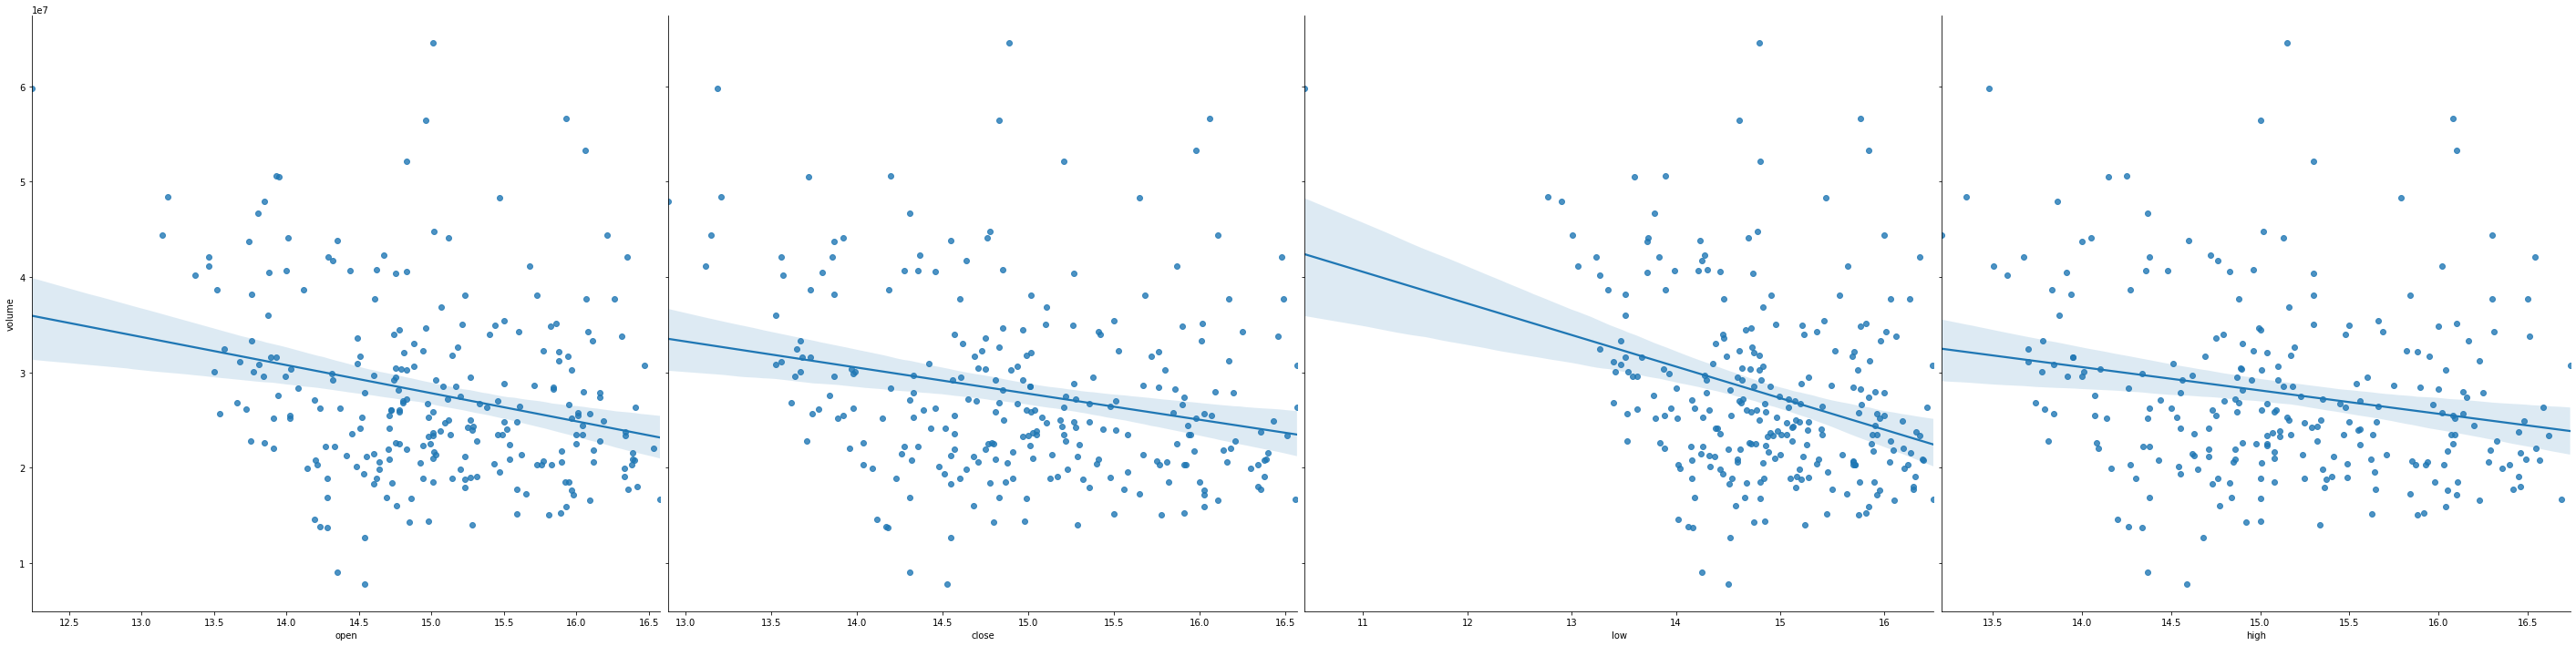

In [39]:
Ford_2015 = Ford.set_index('date')
Ford_2015 = Ford_2015.loc['2015-01':'2015-12']

sns.pairplot(Ford_2015, x_vars=['open', 'close', 'low', 'high'], y_vars=['volume'], size=10, kind='reg')

In [100]:
input = 15
print(Ford.iloc[(GMC['open']-input).abs().argsort()[:2]])
print(Ford.iloc[(GMC['high']-input).abs().argsort()[:2]])
print(Ford.iloc[(GMC['low']-input).abs().argsort()[:2]])
print(Ford.iloc[(GMC['close']-input).abs().argsort()[:2]])

             date   open   high    low  close    volume Name
240245 2013-02-22  12.44  12.50  12.31  12.48  23866354    F
240247 2013-02-26  12.24  12.35  12.11  12.34  29191591    F
             date   open   high    low  close    volume Name
240247 2013-02-26  12.24  12.35  12.11  12.34  29191591    F
240244 2013-02-21  12.51  12.51  12.30  12.39  43703152    F
             date   open   high    low  close    volume Name
240875 2015-08-24  12.24  13.48  10.44  13.19  59805935    F
240247 2013-02-26  12.24  12.35  12.11  12.34  29191591    F
             date   open   high   low  close    volume Name
240246 2013-02-25  12.53  12.57  12.1  12.13  38611381    F
240244 2013-02-21  12.51  12.51  12.3  12.39  43703152    F


/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


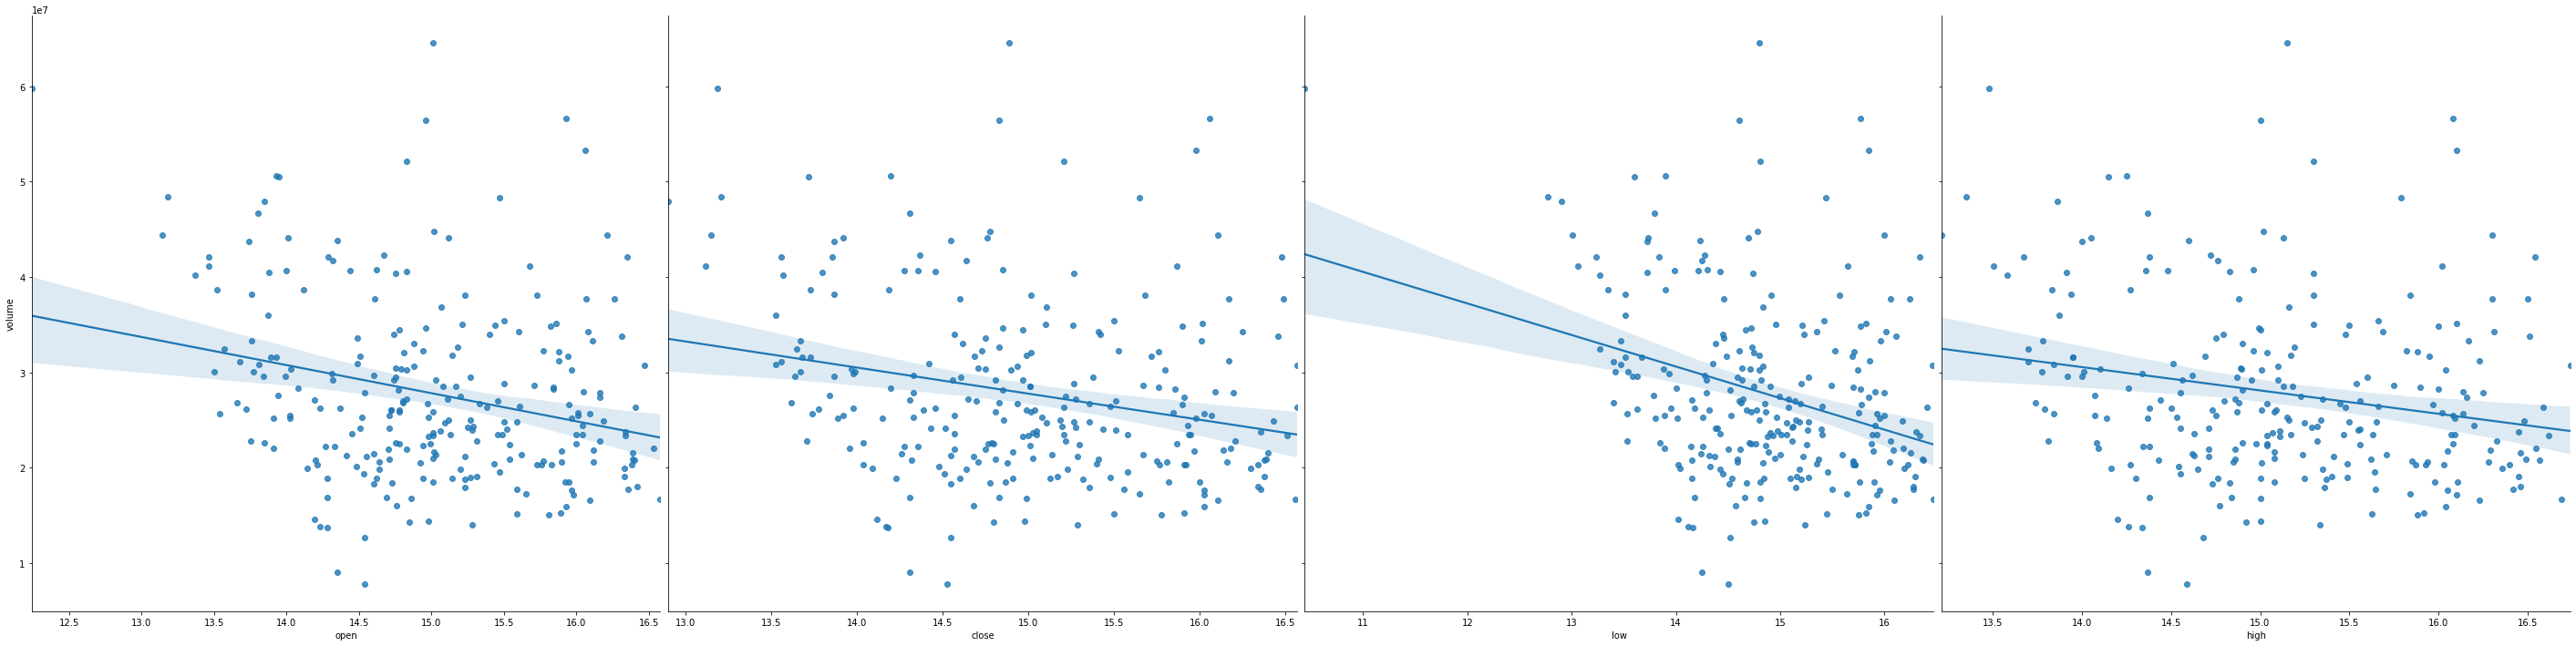

In [41]:
Ford_2016 = Ford.set_index('date')
Ford_2016 = Ford_2016.loc['2015-01':'2015-12']

sns.pairplot(Ford_2016, x_vars=['open', 'close', 'low', 'high'], y_vars=['volume'], size=10, kind='reg')

In [99]:
input = 30
print(Ford.iloc[(GMC['open']-input).abs().argsort()[:2]])
print(Ford.iloc[(GMC['high']-input).abs().argsort()[:2]])
print(Ford.iloc[(GMC['low']-input).abs().argsort()[:2]])
print(Ford.iloc[(GMC['close']-input).abs().argsort()[:2]])

             date   open   high    low  close    volume Name
241074 2016-06-08  13.45  13.49  13.35  13.36  18084759    F
241006 2016-03-02  13.06  13.35  13.04  13.22  36598221    F
             date   open   high    low  close    volume Name
240976 2016-01-19  12.15  12.16  11.82  11.95  41142617    F
241082 2016-06-20  13.39  13.55  13.39  13.42  29666741    F
             date   open     high    low  close    volume Name
240288 2013-04-25  13.40  13.5576  13.35  13.47  42021434    F
240902 2015-10-01  13.76  13.7800  13.47  13.67  33326894    F
             date   open   high    low  close    volume Name
240887 2015-09-10  13.52  13.83  13.35  13.73  38696346    F
241072 2016-06-06  13.08  13.21  13.04  13.18  25588674    F


## Machine learning algorithm (practice)

In [59]:
x = GMC[['open', 'low', 'high']]
y = GMC['close']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [61]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
print(f"Total records : {len(X_train) + len(X_test)}")

944
315
944
315
Total records : 1259


### Linear regression model

#### Train, test, split method

In [95]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(round(linreg.intercept_, 3))
print(linreg.coef_)

0.07
[-0.52108407  0.67868269  0.83931944]


In [96]:
linreg.predict(X_test)

array([36.16218302, 34.93408628, 35.33579144, 36.5788905 , 37.50610802,
       36.0159    , 44.81390015, 36.44031812, 30.60679672, 33.57075616,
       31.82745879, 36.1313607 , 33.73781108, 45.71663101, 29.67653092,
       35.04759995, 34.10345028, 36.3495845 , 29.19143097, 37.31767581,
       35.10433542, 34.33371426, 36.44410231, 37.61884629, 31.74503768,
       30.85424556, 29.03511898, 29.6556734 , 41.65016786, 38.78804657,
       31.17124607, 35.46225274, 34.61642541, 31.55792585, 34.22958278,
       29.13735743, 33.74047367, 32.11182364, 36.08410249, 35.02544267,
       35.79323541, 30.25486096, 37.64471889, 36.84391872, 31.24277957,
       36.41745276, 29.30887752, 37.70648557, 42.88452072, 36.85326922,
       43.35240123, 37.65121997, 37.55542998, 31.73867297, 38.51371377,
       40.4667371 , 34.54329526, 34.47069903, 34.19779031, 34.26498691,
       42.57932333, 39.0891928 , 31.75526476, 34.00253024, 41.92783424,
       33.99442602, 34.78025436, 32.84432054, 34.98049706, 35.64

In [97]:
y_test

250021    36.37
249768    35.14
250028    35.15
249599    36.64
249561    37.69
          ...  
249834    31.31
249952    30.48
249059    26.33
249712    28.56
250279    41.31
Name: close, Length: 315, dtype: float64

In [98]:
round(linreg.score(X_test, y_test)*100, 3)

99.679